In [1]:
from tensorflow.keras import models
import pandas as pd
import numpy as np

In [2]:
test=pd.read_csv("archive/DailyDelhiClimateTest.csv")
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [3]:
timeseries_test=test.copy()
timeseries_test["date"].dtype
timeseries_test["date"]=pd.to_datetime(timeseries_test["date"])
timeseries_test.set_index("date",inplace=True)
timeseries_test

test_data_temp=pd.DataFrame(list(timeseries_test["meantemp"]),columns=["temp"])
test_data_temp

,temp
0,15.913043
1,18.500000
2,17.111111
3,18.700000
4,18.388889
...,...
109,34.500000
110,34.250000
111,32.900000
112,32.875000


In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
test_data_temp=scaler.fit_transform(test_data_temp)

In [5]:
steps=30
X_test=[]
Y_test=[]
for i in range(len(test_data_temp)-steps):
  X_test.append(test_data_temp[i:i+steps])
  Y_test.append(test_data_temp[i+steps])
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(84, 30, 1)
(84, 1)


In [6]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(84, 30, 1)
(84, 1)


In [7]:
model2=models.load_model("Models/model1_ts.h5")

temp_ts=model2.predict(X_test)
temp_ts=scaler.inverse_transform(temp_ts)
temp_ts

array([[15.844476],
       [17.426918],
       [15.684319],
       [18.85582 ],
       [16.433516],
       [17.368801],
       [18.129118],
       [17.176817],
       [17.53605 ],
       [16.254051],
       [17.641363],
       [15.746851],
       [16.72616 ],
       [18.378496],
       [14.739553],
       [17.023012],
       [18.917147],
       [17.70099 ],
       [18.724276],
       [20.13464 ],
       [21.087048],
       [21.29683 ],
       [19.782133],
       [18.179628],
       [18.030748],
       [19.774374],
       [19.864506],
       [19.583826],
       [19.329647],
       [19.821884],
       [22.993273],
       [22.66152 ],
       [21.3107  ],
       [19.99925 ],
       [19.621098],
       [22.262596],
       [23.211931],
       [21.851515],
       [21.388378],
       [19.996529],
       [20.795033],
       [18.413002],
       [19.339134],
       [18.690279],
       [19.399973],
       [25.297325],
       [19.92833 ],
       [22.507717],
       [24.438696],
       [23.810766],


In [8]:
Y_test_inv=scaler.inverse_transform(Y_test)


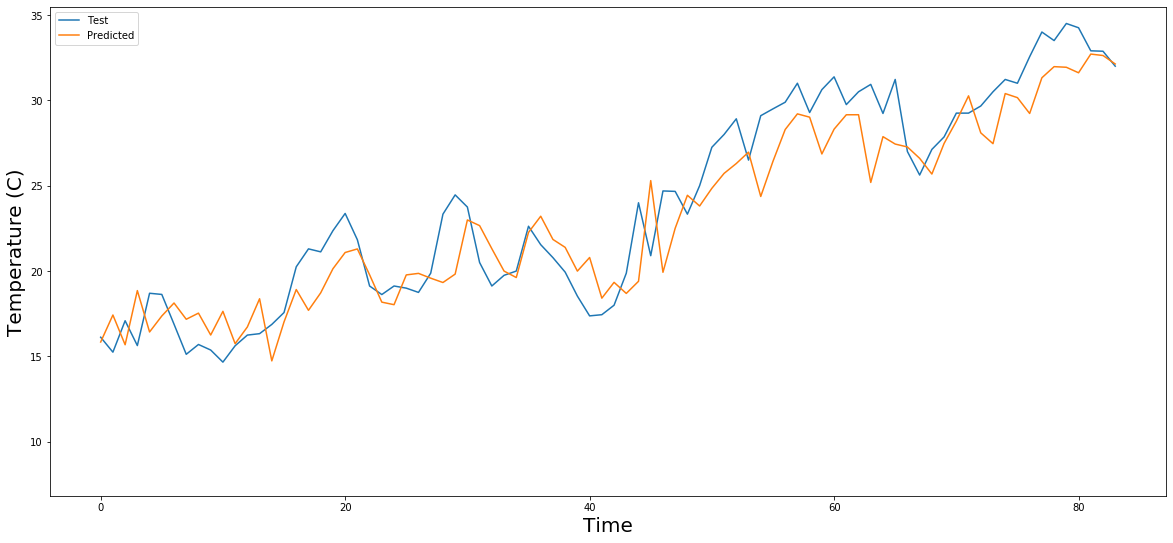

In [10]:
import matplotlib.pyplot as plt
scale_factor=0.5
plt.figure(figsize=(20,9))
plt.plot(Y_test_inv)
plt.plot(temp_ts)
ymin,ymax=plt.ylim()
plt.ylim(ymin * scale_factor, ymax)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','Predicted'))
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
from sklearn import metrics

In [14]:
import math
mse=mean_squared_error(Y_test_inv,temp_ts)
mse=math.sqrt(mse)
mae=mean_absolute_error(Y_test_inv,temp_ts)
print(f'{mse} {mae} {metrics.r2_score(Y_test_inv,temp_ts)}')

2.21325264841926 1.788480047162633 0.8589278379311879


In [13]:
??mean_squared_error